## Evaluating UNET model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [27]:
columns = [#'fpr_label_0', 'tpr_label_0',
           'fpr_label_1', 'tpr_label_1',
           'fpr_label_2', 'tpr_label_2',
           'fpr_label_3', 'tpr_label_3']

list_columns = ['macro_fpr', 'macro_tpr', 
                'fpr_label_0', 'tpr_label_0', 'thresholds_label_0', 'f1_label_0', 'accuracy_label_0',
                'fpr_label_1', 'tpr_label_1', 'thresholds_label_1', 'f1_label_1', 'accuracy_label_1',
                'fpr_label_2', 'tpr_label_2', 'thresholds_label_2', 'f1_label_2', 'accuracy_label_2',
                'fpr_label_3', 'tpr_label_3', 'thresholds_label_3', 'f1_label_3', 'accuracy_label_3',]

def n_points(data:dict, columns:list, N:int=100000)->dict:
    if N != -1:
        for column in columns:
            if column in data.keys():
                idx = np.round(np.linspace(0, len(data[column]) - 1, N)).astype(int)
                data[column] = [data[column][i] for i in idx ]

    return data

def without_keys(d, keys):
    return {k: v for k, v in d.items() if k not in keys}

def name_to_tuple(columns):
    tuples = []
    for column in columns:
        if '_' in column:
            tmp = column.split('_')
            metric = tmp[0]
            label = ' '.join(tmp[1:])
            tuples.append((label, metric))
        else:
            tuples.append(('Model', column))
    return tuples

def dataframe_maker(data:dict, labels:int, multiplier=str)->pd.DataFrame:
    df = pd.DataFrame(data=[[v for k,v in data.items()]],  columns=data.keys())
    df.insert(0, ' ', multiplier)
    
    df.drop(['accuracy', 'loss_subm'], axis=1, inplace=True)
    df.rename(columns = {'macro_auc': 'AUC'}, inplace = True)
    
    if labels == 3:
        df['recall_label_3'] = np.nan
        df['iou_label_3'] = np.nan
        df['auc_label_3'] = np.nan
        df['dice_label_3'] = np.nan
        df['precision_label_3'] = np.nan
        
    df = df[[' ', 'AUC', 'precision_label_0', 'recall_label_0', 'iou_label_0',
             'dice_label_0', 'auc_label_0', 'precision_label_1', 'recall_label_1',
             'iou_label_1', 'dice_label_1', 'auc_label_1', 'precision_label_2',
             'recall_label_2', 'iou_label_2', 'dice_label_2', 'auc_label_2',
             'recall_label_3', 'iou_label_3', 'auc_label_3', 'dice_label_3',
             'precision_label_3']]
    df.columns = pd.MultiIndex.from_tuples(name_to_tuple(df.columns), names=[' ',' '])
    df.rename(columns = {'accuracy': 'Accuracy', 
                         'recall': 'Recall', 
                         'iou': "IOU",
                         'auc': 'AUC',
                         'dice':'DICE',
                         'precision':'Precision'}, 
              inplace = True)
    df.drop(['label 0'], axis=1, inplace=True)    
    
    if labels == 3:
        df.rename(index={0:'(B)'},inplace=True)
    elif labels == 4:
        df.rename(index={0:'(A)'},inplace=True)
    
    return df

def generate_pr_plot(data:dict, title:str, labels:int):
    sns.set_theme(context='paper', 
                   style='whitegrid', 
                   palette='deep', 
                   font='sans-serif', 
                   font_scale=1.25, 
                   color_codes=True, 
                   rc={'figure.figsize':(10,7), 
                       'lines.linewidth':2})
        
    #sns.lineplot(x=[0,1], y=[1,0], style=True, dashes=[(2,2)])#, label='No skill')
    #sns.lineplot(data=data, x=f'macro_fpr', y=f'macro_tpr', label=f'macro')
    colors = [(0.,0.44705882,0.69803922), (0.,0.61960784,0.45098039), (0.90196078,0.62352941,0.),  (0.83529412,0.36862745,0.)]
    if labels == 3:
        colors = [(0.,0.44705882,0.69803922), (0.,0.61960784,0.45098039), (0.83529412,0.36862745,0.)]
    
    for i in range(labels):
        sns.lineplot(data=data, x=f'tpr_label_{i}', y=f'fpr_label_{i}', label=f'label_{i}', color=colors[i])
    
    plt.title(title)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

In [26]:
print(np.array([0,114,178])/255, np.array([0,158,115])/255, np.array([230,159,0])/255,  np.array([244,94,0])/255, sep='\n')

[0.         0.44705882 0.69803922]
[0.         0.61960784 0.45098039]
[0.90196078 0.62352941 0.        ]
[0.95686275 0.36862745 0.        ]


In [3]:
temp = open("3labels\\[1,1,0.35]\\20211128_005518_submission.json")
temp = temp.read()
best_3l = json.loads(temp)

temp = open("3labels\\[1,1,1]\\20211128_003232_submission.json")
temp = temp.read()
def_3l = json.loads(temp)

temp = open("4labels\\[1,1,0.6,0.4]\\20211127_203828_submission.json")
temp = temp.read()
best_4l = json.loads(temp)

temp = open("4labels\\[1,1,1,1]\\20211128_000034_submission.json")
temp = temp.read()
def_4l = json.loads(temp)

In [4]:
best_3l = n_points(best_3l, columns)
def_3l = n_points(def_3l, columns)
best_4l = n_points(best_4l, columns)
def_4l = n_points(def_4l, columns)

In [5]:
reduced_best_3l = without_keys(best_3l, list_columns)
reduced_def_3l = without_keys(def_3l, list_columns)
reduced_best_4l = without_keys(best_4l, list_columns)
reduced_def_4l = without_keys(def_4l, list_columns)

In [6]:
best3_df = dataframe_maker(reduced_best_3l, labels=3, multiplier=['1,1,0.35'])
def3_df = dataframe_maker(reduced_def_3l, labels=3, multiplier=['1,1,0.35'])
best4_df = dataframe_maker(reduced_best_4l, labels=4, multiplier=['1,1,0.6,0.4'])
def4_df = dataframe_maker(reduced_def_4l, labels=4, multiplier=['1,1,1,1'])

In [7]:
all_df = pd.concat([best4_df, def4_df, best3_df, def3_df, ], axis=0)

all_df = all_df.round(4)
all_df.replace(np.nan, '-', inplace=True)

In [8]:
all_df

#print(all_df.to_latex())

Model           label 1                                   label 2  \
                     AUC Precision  Recall     IOU    DICE     AUC Precision   
(A)  1,1,0.6,0.4  0.6698    0.9373  0.8186  0.7761  0.8739  0.9825    0.3560   
(A)      1,1,1,1  0.6499    0.9644  0.7342  0.7148  0.8337  0.9803    0.3228   
(B)     1,1,0.35  0.8307    0.9913  0.9946  0.9860  0.9930  0.9995    0.4204   
(B)     1,1,0.35  0.8296    0.9902  0.9935  0.9838  0.9918  0.9992    0.3807   

                                    label 3                                    
     Recall     IOU    DICE     AUC  Recall     IOU     AUC    DICE Precision  
(A)  0.6207  0.2924  0.4525  0.2636  0.7776  0.0963  0.4149  0.1757     0.099  
(A)  0.7351  0.2891  0.4486  0.2791   0.783   0.062  0.3252  0.1168    0.0631  
(B)  0.6249  0.3357  0.5027  0.5130       -       -       -       -         -  
(B)  0.6322  0.3117  0.4752  0.4929       -       -       -       -         -

### Table LaTeX

https://www.overleaf.com/1943597164htrgcbnpdsss

                \documentclass{article}
                \usepackage{blindtext}
                \usepackage[a4paper, total={6in, 8in}]{geometry}
                \usepackage{amsmath}
                \usepackage{booktabs}
                \usepackage{array}
                \newcolumntype{L}{>{$}l<{$}}
                \newcolumntype{C}{>{$}c<{$}}
                \newcolumntype{R}{>{$}r<{$}}
                \newcommand{\nm}[1]{\textnormal{#1}}

                \begin{document}
                \begin{table}[!h]
                \centering
                \scriptsize
                \setlength\tabcolsep{1pt}
                \begin{tabular}{LCR CCCCR CCCCR CCCCR}

                \toprule
                & 
                \multicolumn{2}{ c }{\textbf{Model}} & 
                \multicolumn{5}{ c }{\textbf{Label 1}} & 
                \multicolumn{5}{ c }{\textbf{Label 2}} & 
                \multicolumn{5}{ c }{\textbf{Label 3}} \\

                \cmidrule(lr){2-3}
                \cmidrule(lr){4-8}
                \cmidrule(lr){9-13}
                \cmidrule(lr){14-18}

                & 
                Multiplier & AUC & 
                AUC & DICE & IOU & Precision & Recall &
                AUC & DICE & IOU & Precision & Recall &
                AUC & DICE & IOU & Precision & Recall \\


                \midrule
                \textbf{A} &  
                1, 1, .6, .4 &  0.6698 &
                0.9373 &  0.8186 &  0.7761 &  0.8739 &  0.9825 &
                0.3560 &  0.6207 &  0.2924 &  0.4525 &  0.2636 &  
                0.7776 &  0.0963 &  0.4149 &  0.1757 &     0.099 \\
                &      
                1, 1, 1, 1 &  0.6499 &    
                0.9644 &  0.7342 &  0.7148 &  0.8337 &  0.9803 &    
                0.3228 &  0.7351 &  0.2891 &  0.4486 &  0.2791 &  
                0.783 &   0.062 &  0.3252 &  0.1168 &    0.0631 \\

                \textbf{B} &
                1, 1, .35 &  0.8307 &    
                0.9913 &  0.9946 &  0.9860 &  0.9930 &  0.9995 &    
                0.4204 &  0.6249 &  0.3357 &  0.5027 &  0.5130 &      
                - &       - &       - &       - &         - \\
                & 
                1, 1, 1 &  0.8296 &    
                0.9902 &  0.9935 &  0.9838 &  0.9918 &  0.9992 &    
                0.3807 &  0.6322 &  0.3117 &  0.4752 &  0.4929 &
                - &       - &       - &       - &         - \\
                \bottomrule
                \end{tabular}
                \end{table}

                \end{document}


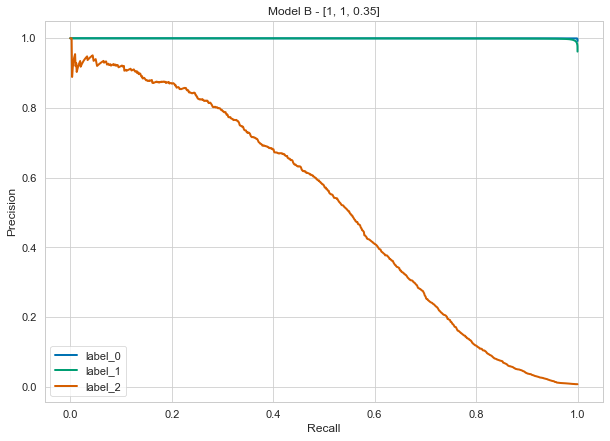

In [29]:
generate_pr_plot(best_3l, 'Model B - [1, 1, 0.35]', 3)


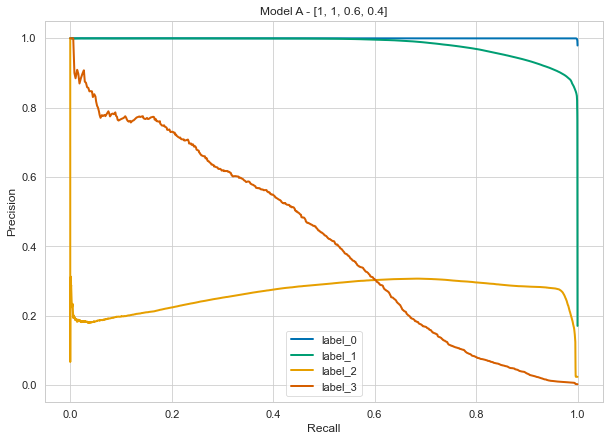

In [28]:
generate_pr_plot(best_4l, 'Model A - [1, 1, 0.6, 0.4]', 4)

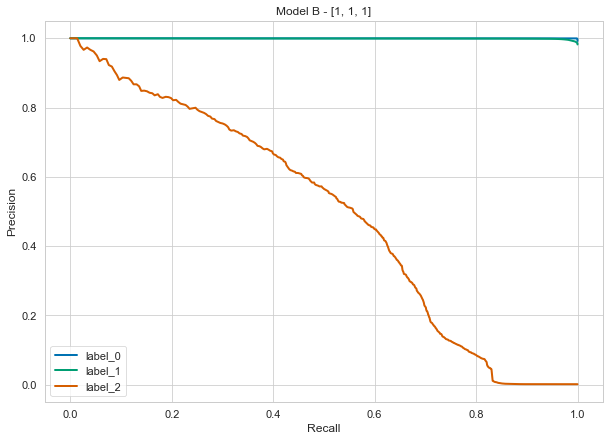

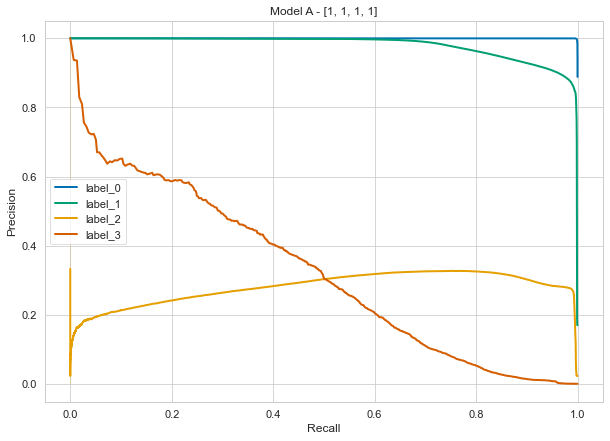

In [30]:
generate_pr_plot(def_3l, 'Model B - [1, 1, 1]', 3)

generate_pr_plot(def_4l, 'Model A - [1, 1, 1, 1]', 4)